In [24]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor


In [25]:
# pip install xlrd
data = pd.read_excel("/Users/aishwaryak/Desktop/ip_project/Concrete_Data.xls")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [27]:
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [28]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [29]:
print("Shape of our Data is :", data.shape)

Shape of our Data is : (1030, 9)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [31]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [32]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [33]:
#data preprocessing
data.duplicated().sum()

np.int64(25)

In [34]:
# Remove duplicated rows
data.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of duplicated rows after removal:", data.duplicated().sum())

Number of duplicated rows after removal: 0


In [35]:
data.duplicated().sum()

np.int64(0)

In [36]:
# Create Water-to-Cement Ratio feature
# Add a small epsilon to the denominator to avoid division by zero in case of zero cement content
data['Water_to_Cement_Ratio'] = data['Water  (component 4)(kg in a m^3 mixture)'] / (data['Cement (component 1)(kg in a m^3 mixture)'] + 1e-6)

# You could also explore other potentially useful ratios, for example:
# Aggregate to Cement Ratio:
# data['Aggregate_to_Cement_Ratio'] = (data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] + data['Fine Aggregate (component 7)(kg in a m^3 mixture)']) / (data['Cement (component 1)(kg in a m^3 mixture)'] + 1e-6)

# Fly Ash to Cement Ratio:
# data['Fly_Ash_to_Cement_Ratio'] = data['Fly Ash (component 3)(kg in a m^3 mixture)'] / (data['Cement (component 1)(kg in a m^3 mixture)'] + 1e-6)

# Display the first few rows with the new feature
display(data[['Water  (component 4)(kg in a m^3 mixture)', 'Cement (component 1)(kg in a m^3 mixture)', 'Water_to_Cement_Ratio']].head())

,Water (component 4)(kg in a m^3 mixture),Cement (component 1)(kg in a m^3 mixture),Water_to_Cement_Ratio
0,162.0,540.0,0.300000
1,162.0,540.0,0.300000
2,228.0,332.5,0.685714
3,228.0,332.5,0.685714
4,192.0,198.6,0.966767


In [37]:
import matplotlib.pyplot as plt

# Set the plotting style to dark_background
plt.style.use('dark_background')

# You can now regenerate your plots, and they will have a black background.
# For example, you can re-run the cells for generating scatter plots, box plots, and the pairplot.

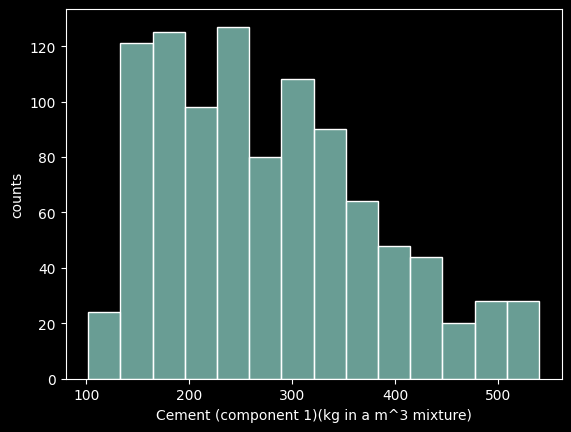

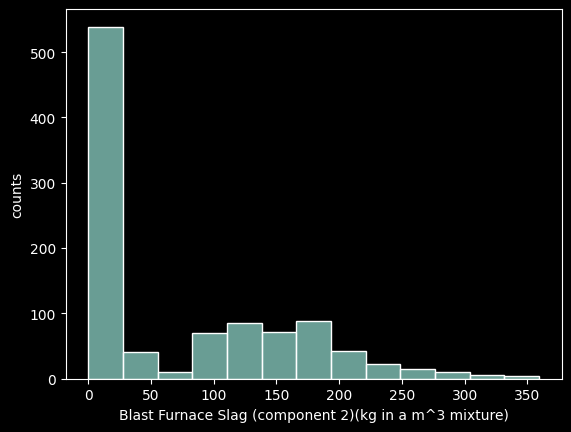

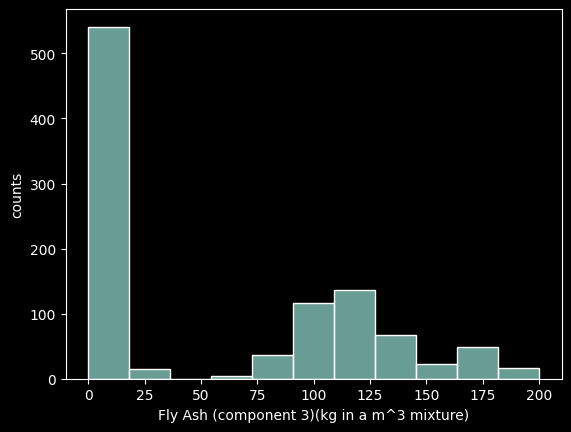

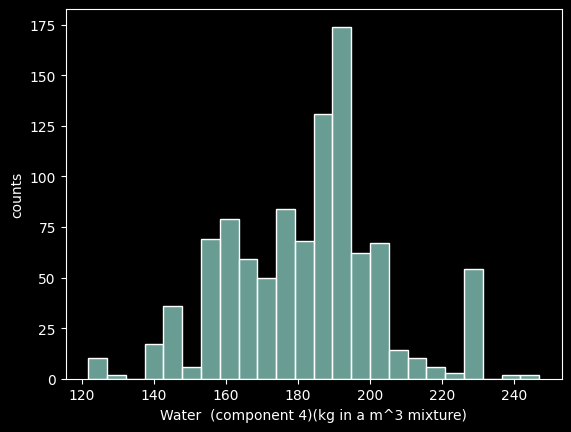

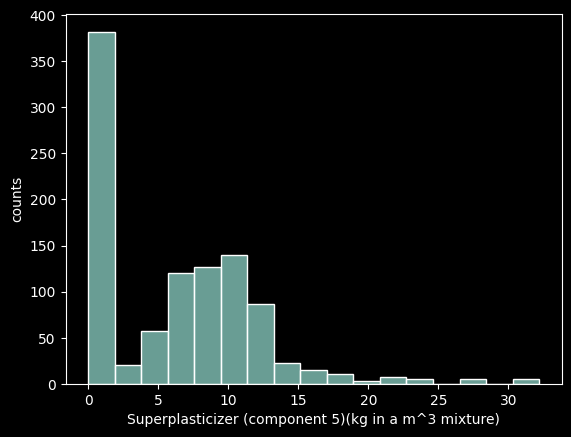

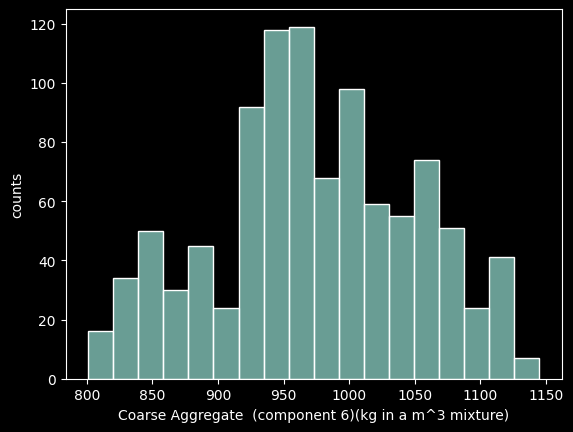

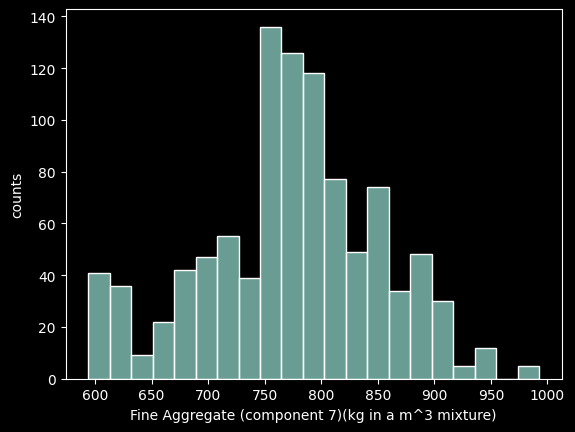

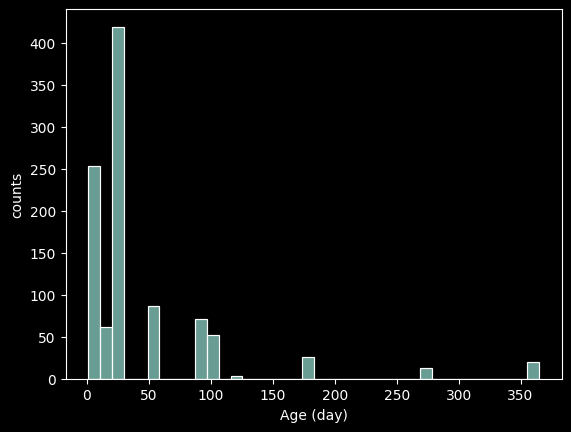

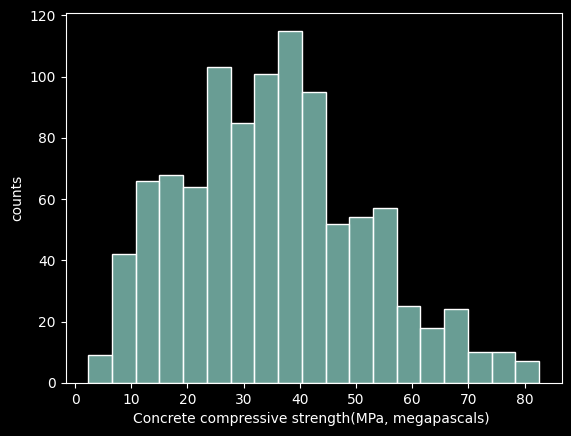

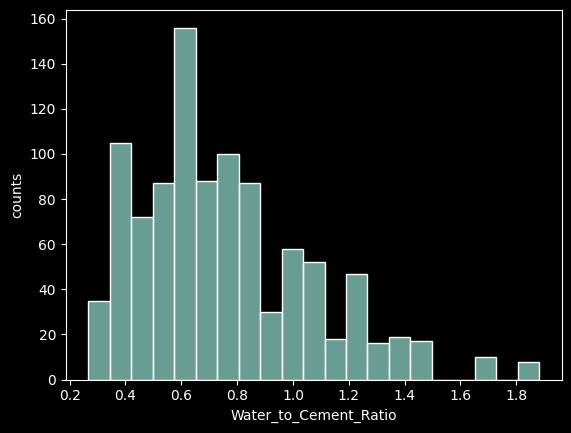

In [38]:
#look at data distribution
for i in data.columns:
    # Skip the 'bins' column as it contains Interval objects
    if i == 'bins':
        continue
    sns.histplot(data[i]) # Changed from plt.histplot
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

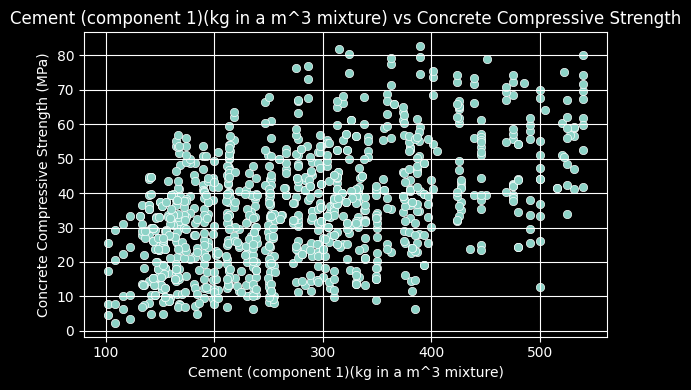

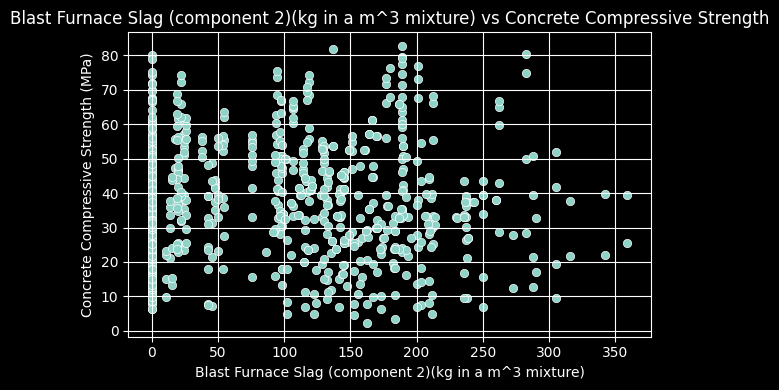

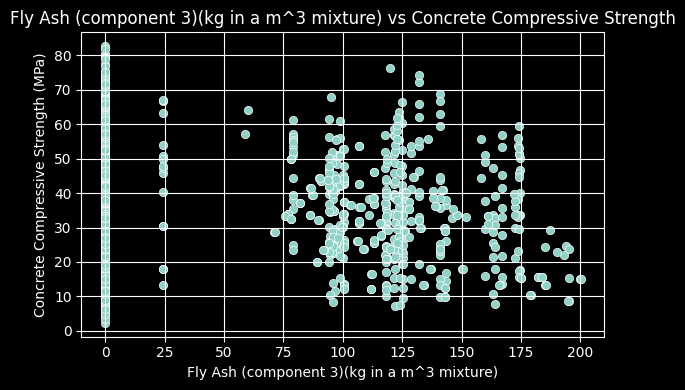

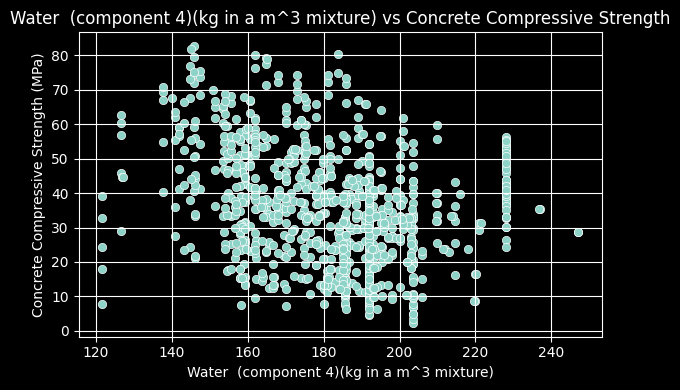

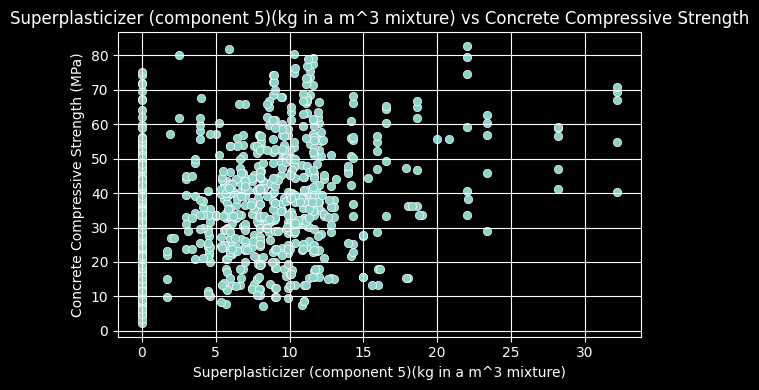

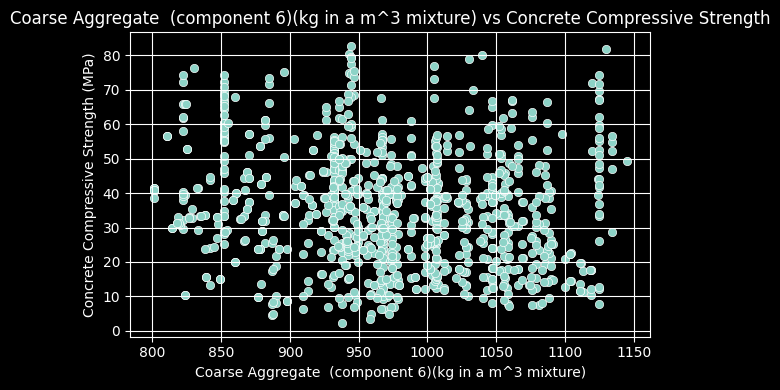

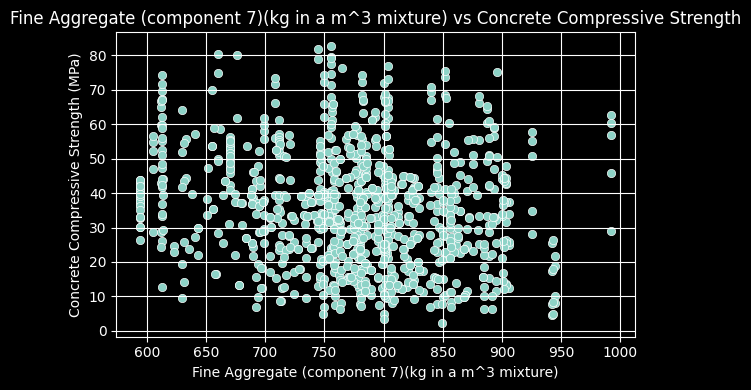

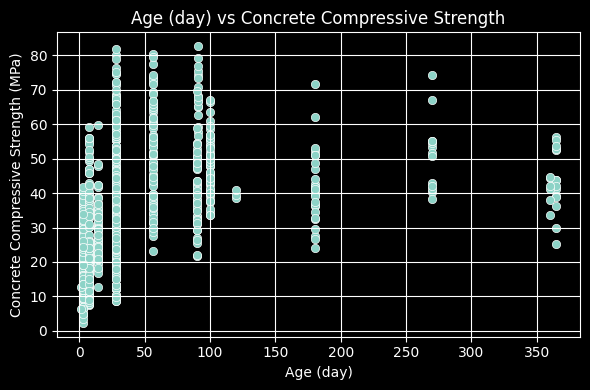

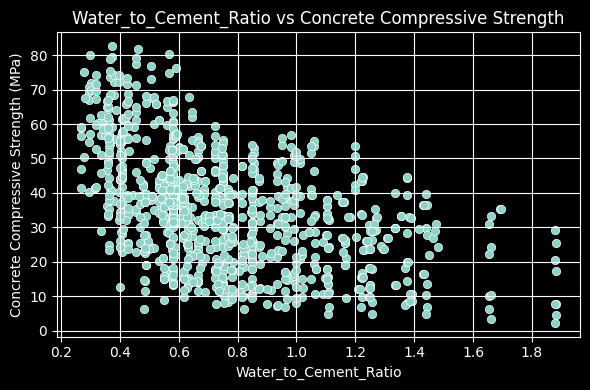

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of input features (excluding target and any non-numeric or binned columns)
features = [col for col in data.columns if col != 'Concrete compressive strength(MPa, megapascals) ' and col != 'bins']

# Plot scatter plots of each feature vs target
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data['Concrete compressive strength(MPa, megapascals) '])
    plt.title(f'{feature} vs Concrete Compressive Strength')
    plt.xlabel(feature)
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [40]:
bins = pd.qcut(data['Concrete compressive strength(MPa, megapascals) '], q=4)
data['bins'] = bins

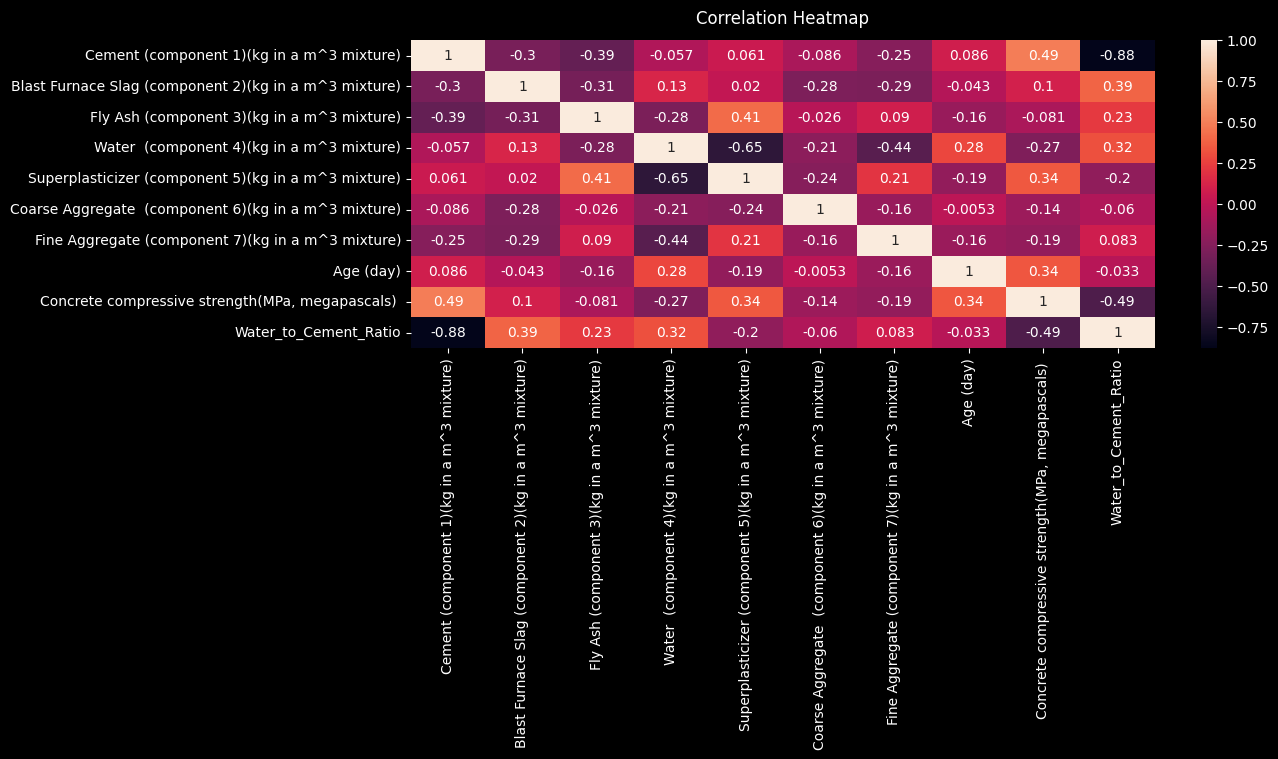

In [41]:
#heat map using Pearson's coefficient
plt.figure(figsize=(12, 4))
sns.heatmap(data.drop(columns=['bins']).corr(), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [42]:
#data preparation
# Features and target
x = data.drop(columns=['Concrete compressive strength(MPa, megapascals) ', 'bins'])
y = data['Concrete compressive strength(MPa, megapascals) ']

In [43]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=35)

In [44]:
#model implementation
#Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42) # Using random_state for reproducibility
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt) #evaluating the model
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt) * 100





#Random Forest Algorithm

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Initialize model
rf_model.fit(x_train, y_train) # Train
y_pred_rf = rf_model.predict(x_test) # Predict
mse = mean_squared_error(y_test, y_pred_rf) # Evaluate
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)*100






#XGBoost Regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42) # Initialize XGBoost Regressor model
xgb_model.fit(x_train, y_train) # Train the model
y_pred_xgb = xgb_model.predict(x_test) # Predict on test set
mse_xgb = mean_squared_error(y_test, y_pred_xgb) # Evaluate the model
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb) * 100






#AdaBoost Regression
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)# Initialize AdaBoost Regressor model
adaboost_model.fit(x_train, y_train) # Train the model
y_pred_adaboost = adaboost_model.predict(x_test) # Predict on test set
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost) # Evaluate the model
rmse_adaboost = np.sqrt(mse_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost) * 100

In [46]:
# Create a list to store model results
model_results = []

# Add results for each model


model_results.append({
    'Model': 'Decision Tree',
    'MSE': mse_dt,
    'RMSE': rmse_dt,
    'MAE': mae_dt,
    'R² (%)': r2_dt
})

model_results.append({
    'Model': 'Random Forest',
    'MSE': mse, # Assuming mse, rmse, mae, r2 are from the Random Forest model based on previous code
    'RMSE': rmse,
    'MAE': mae,
    'R² (%)': r2
})


model_results.append({
    'Model': 'XGBoost',
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'MAE': mae_xgb,
    'R² (%)': r2_xgb
})

model_results.append({
    'Model': 'AdaBoost',
    'MSE': mse_adaboost,
    'RMSE': rmse_adaboost,
    'MAE': mae_adaboost,
    'R² (%)': r2_adaboost
})

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(model_results)

# Display the results, sorted by R² score
results_df = results_df.sort_values(by='R² (%)', ascending=False)
display(results_df)

,Model,MSE,RMSE,MAE,R² (%)
2,XGBoost,20.950558,4.577178,3.112955,92.080087
1,Random Forest,25.514835,5.051221,3.578560,90.354658
0,Decision Tree,49.458178,7.032651,4.704529,81.303386
3,AdaBoost,55.355699,7.440141,5.965916,79.073954


/var/folders/w0/7cdg96ns7h15zxg_vtnhnttc0000gn/T/ipykernel_33016/530920322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² (%)', data=results_df, palette='viridis')


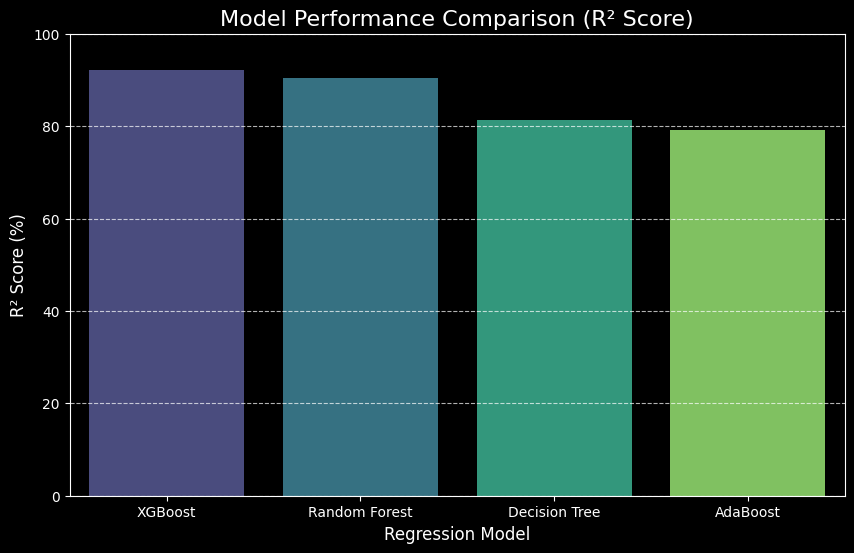

In [47]:
#conclusion
# Visualize the R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² (%)', data=results_df, palette='viridis')
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.xlabel('Regression Model', fontsize=12)
plt.ylabel('R² Score (%)', fontsize=12)
plt.ylim(0, 100) # R2 score ranges from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
import gradio as gr
import pandas as pd
import numpy as np
import xgboost as xgb

# Load your dataset (make sure 'data' is defined earlier in your code)
# Example:
# data = pd.read_csv("concrete_data.csv")

# Load the trained XGBoost model (make sure you've trained/saved it)
# Example:
# xgb_model = xgb.XGBRegressor()
# xgb_model.load_model("xgb_model.json")

# Prediction function
def predict_strength(cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age):
    input_data = pd.DataFrame([[
        cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age,
        water / (cement + 1e-6)  # water-to-cement ratio
    ]], columns=[
        'Cement (component 1)(kg in a m^3 mixture)',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
        'Fly Ash (component 3)(kg in a m^3 mixture)',
        'Water  (component 4)(kg in a m^3 mixture)',
        'Superplasticizer (component 5)(kg in a m^3 mixture)',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)',
        'Age (day)',
        'Water_to_Cement_Ratio'
    ])

    prediction = xgb_model.predict(input_data)
    return f"Predicted Concrete Compressive Strength: {prediction[0]:.2f} MPa"

# Build Gradio sliders (cast to float/int to avoid int64 errors)
iface = gr.Interface(
    fn=predict_strength,
    inputs=[
        gr.Slider(minimum=float(data['Cement (component 1)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Cement (component 1)(kg in a m^3 mixture)'].max()),
                  value=float(data['Cement (component 1)(kg in a m^3 mixture)'].mean()),
                  label="Cement (kg/m^3)"),
        gr.Slider(minimum=float(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].max()),
                  value=float(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].mean()),
                  label="Blast Furnace Slag (kg/m^3)"),
        gr.Slider(minimum=float(data['Fly Ash (component 3)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Fly Ash (component 3)(kg in a m^3 mixture)'].max()),
                  value=float(data['Fly Ash (component 3)(kg in a m^3 mixture)'].mean()),
                  label="Fly Ash (kg/m^3)"),
        gr.Slider(minimum=float(data['Water  (component 4)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Water  (component 4)(kg in a m^3 mixture)'].max()),
                  value=float(data['Water  (component 4)(kg in a m^3 mixture)'].mean()),
                  label="Water (kg/m^3)"),
        gr.Slider(minimum=float(data['Superplasticizer (component 5)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Superplasticizer (component 5)(kg in a m^3 mixture)'].max()),
                  value=float(data['Superplasticizer (component 5)(kg in a m^3 mixture)'].mean()),
                  label="Superplasticizer (kg/m^3)"),
        gr.Slider(minimum=float(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].max()),
                  value=float(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].mean()),
                  label="Coarse Aggregate (kg/m^3)"),
        gr.Slider(minimum=float(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'].min()),
                  maximum=float(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'].max()),
                  value=float(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'].mean()),
                  label="Fine Aggregate (kg/m^3)"),
        gr.Slider(minimum=int(data['Age (day)'].min()),
                  maximum=int(data['Age (day)'].max()),
                  value=int(data['Age (day)'].mean()),
                  step=1,
                  label="Age (day)")
    ],
    outputs="text",
    title="Concrete Compressive Strength Prediction",
    description="Enter the concrete mix parameters to predict compressive strength."
)

# Launch (works in VS Code: opens a local browser tab)
iface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio/flagged/dataset1.csv
